# M2 | Exploration Notebook

In this notebook, you will do a first exploration of the data set that you will use for your project. One part of this exploration is guided, i.e. we will ask you to solve specific questions (task 1-3). The other part is open, i.e. we will ask you to come up with your own exploration ideas (task 4). 

Please upload your solved notebook to Moodle (under Milestone 2 Submission)adding your SCIPER number in title, example: m2-lernnavi-456392.ipynb


## Brief overview of Lernnavi
[Lernnavi](https://www.lernnavi.ch) is an instrument for promoting part of the basic technical study skills in German and mathematics.


For the guided part of the exploration we will focus on the three main tables:
* *users*: demographic information of users.
* *events*: events done by the users in the platform.
* *transactions*: question and answer solved by user.

### Users
* user_id: unique identifier of user in database.
* gender: only three values: M male, F female or missing (star). 
* canton: swiss canton.
* class_level: school year in swiss system.
* study: boolean variable. True if the student participated in the study.
* class_id: identifier of student’s class (only for the students in the experiment)


### Events
* event_id: unique identifier of event in database.
* user_id: user who peformed the event.
* event_date: timestamp of event.
* category: classification of action (task, general, statistics, etc).
* action: type of action performed.
* event_type: whether the students viewed or clicked in the event.
* transaction_token: used to link to transactions table.
* tracking_data: optional content associated to this event (e.g., the new points mastered for a topic).
* session_id: session during which the event took place.
* topic_id: the topics represent the taxonomy of categories shown in the Deutsch and Math dashboard. See topics_translated table.
* session_closed: whether the session has been finished (1: finished; 0: not finished).
* session_type: whether the session is a learn or level check (1: learn; 2: level check).
* session_accepted: whether the user finally accepted the result of the session (1: accepted; 0: refused).

### Transactions
* transaction_id: unique identifier of transaction in database.
* transaction_token: used to link to events table.
* user_id: user who performed the transaction.
* document_id: document that was answered in transaction.
* document_version: version of document that was answered.
* evaluation: whether the user answered correctly or not. It is possible that it was only partially right. 
* input: answer the user gave.
* start_time: timestamp of when the user started answering.
* commit_time: timestamp of when the user submitted the answer.
* user_agent: the browser that the user used.
* solution: solution to question.
* type: type of question that was answered. 
* session_id: session during which the event took place.
* topic_id: the topics represent the taxonomy of categories shown in the Deutsch and Math dashboard. See topics_translated table.
* session_closed: whether the session has been finished (1: finished; 0: not finished).
* session_type: whether the session is a learn or level check (1: learn; 2: level check).
* session_accepted: whether the user finally accepted the result of the session (1: accepted; 0: refused).
* challenge: (boolean) whether the transaction was part of a challenge or not. Professors can create challenges containing different documents
* challenge_id: unique identifier of challenges. The same challenge can be done by multiple students. The pre-test and post-test in the study were designed like challenges.
* challenge_order: within the challenge, the order of the questions. The order matters because sometimes the questions were adapted depending on the student’s knowledge.
* challenge_name: name given to the challenges. 

## Useful Metadata Files
* [Data description](https://docs.google.com/document/d/1NPFNwi79JddrxZM-CpltH5nHro5btHRSNnYcAGj7Y0A/edit?usp=sharing)


In [1]:
# Import the tables of the data set as dataframes.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = './data' #You many change the directory

users = pd.read_csv('{}/users.csv.gz'.format(DATA_DIR))
events = pd.read_csv('{}/events.csv.gz'.format(DATA_DIR))
transactions = pd.read_csv('{}/transactions.csv.gz'.format(DATA_DIR))

In [2]:
transactions.head()

,transaction_id,transaction_token,user_id,document_id,document_version,evaluation,input,start_time,commit_time,user_agent,...,type,session_id,topic_id,session_closed,session_type,session_accepted,challenge,challenge_id,challenge_order,challenge_name
0,688413,88fdcaad-f73b-46a2-b561-d262f2441442,393211,awd0i1DlVtg6kuMZSkpmHa,75002,PARTIAL,"{""type"": ""MULTI_COLOR_HIGHLIGHT"", ""highlighted...",2021-05-21 07:58:27.312000000,2021-05-21 08:03:43.020000000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,MULTI_COLOR_HIGHLIGHT,NaN,NaN,NaN,NaN,NaN,True,1083.0,2.0,G3h – Training Rhetorik
1,688414,a75eb7b4-b2c2-47d4-9200-27980c175037,393211,arhWF3BT53V9W8cGOaZVPX,75012,PARTIAL,"{""type"": ""MULTI_COLOR_HIGHLIGHT"", ""highlighted...",2021-05-21 08:04:05.067000000,2021-05-21 08:07:21.288999936,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,MULTI_COLOR_HIGHLIGHT,NaN,NaN,NaN,NaN,NaN,True,1083.0,3.0,G3h – Training Rhetorik
2,688415,61eb829d-bdda-4107-86af-ad9a14a7bdc9,393211,9wk5dtV2mF59odW0wCEYYc,75003,PARTIAL,"{""type"": ""CLOZE_TEXT"", ""clozeInputs"": [""Person...",2021-05-21 08:07:37.048000000,2021-05-21 08:13:30.953999872,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,CLOZE_TEXT,NaN,NaN,NaN,NaN,NaN,True,1083.0,4.0,G3h – Training Rhetorik
3,688416,30ff0d8a-865d-460b-9177-b698a52b0d5c,393211,afilxZ8LycP5LReULeKngW,75009,CORRECT,"{""type"": ""DND_PAIRS"", ""input"": [""<p>Ich gehe i...",2021-05-21 08:13:38.943000000,2021-05-21 08:22:13.975000064,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,DND_PAIRS,NaN,NaN,NaN,NaN,NaN,True,1083.0,5.0,G3h – Training Rhetorik
4,688417,0adedf3b-ba35-4497-8c6b-b5c2f6fcbbf3,393211,76m6v05NCeX8x2Wr5tKRE3,75007,CORRECT,"{""type"": ""DND_PAIRS"", ""input"": [""<p>Kleiner Ma...",2021-05-21 08:22:19.391000000,2021-05-21 08:22:55.366000128,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,DND_PAIRS,NaN,NaN,NaN,NaN,NaN,True,1083.0,6.0,G3h – Training Rhetorik


In [15]:
events.action.value_counts()

PAGE_VISIT              2113982
REVIEW_TASK             1734632
SUBMIT_ANSWER           1404142
NAVIGATE_DASHBOARD      1093791
NEXT                     907521
WINDOW_VISIBLE_FALSE     851634
WINDOW_VISIBLE_TRUE      705679
VIEW_QUESTION            451981
OPEN_FEEDBACK            281632
CLOSE_FEEDBACK           251044
GO_TO_THEORY             211418
SUBMIT_SEARCH            162067
VIEW_SESSION_END         159925
SKIP                     158420
WINDOW_OPEN              150781
CLOSE                    131124
WINDOW_CLOSE             122121
LOGIN                    105144
SURVEY_BANNER             68655
SELECT_STATISTICS         57119
ACCEPT_PROGRESS           30996
GO_TO_COMMENTS            12158
GO_TO_BUG_REPORT           9772
LOGOUT                     6821
SHARE_SESSION              3320
REJECT_PROGRESS            3257
PRETEST                    1709
NAVIGATE_SURVEY            1111
GO_TO_SESSION               563
REQUEST_HINT                562
SHARE                        90
Name: ac

## Task 1: Simple Statistics

In this task you are asked to do a first coarse exploration of the data set, using simple statistics and visualizations.

#### a) How many distinct participants do we have in the data set?


In [3]:
users.user_id.nunique()

30929

#### b) How many transactions were done per user? Please provide a visualization and discuss the distribution.

In [4]:
transactions.groupby('user_id').transaction_id.count().sort_values(ascending=False).head(10)
events.groupby('action').action.count().sort_values(ascending=False).head(10).plot(kind='bar')

user_id
387711    15982
395243     2640
415758     2498
394969     2434
389968     2335
395041     2195
394913     2112
396334     2028
394966     2027
395046     2022
Name: transaction_id, dtype: int64

*Your discussion/interpretation goes here*


#### c) Which are the 10 most popular event actions? Please provide a visualization of the frequency of the top 10 event actions.

Hint: See actions in table events.

<AxesSubplot:xlabel='action'>

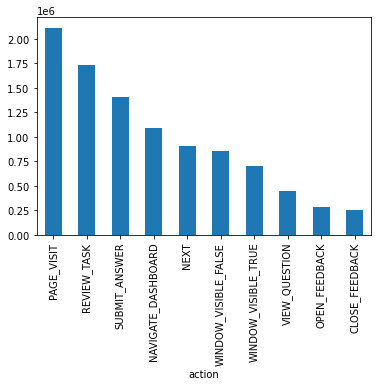

In [5]:
# Find the most popular event actions
events.groupby('action').action.count().sort_values(ascending=False).head(10)
# Provide visualization of the frequency of most popular event actions
events.groupby('action').action.count().sort_values(ascending=False).head(10).plot(kind='bar')

*Your discussion/interpretation goes here*

## Task 2: Static Analysis

In this second task, you will do a univariate an multivariate exploration of some aggregated features.

#### a) Build a data frame containing one row per user:

``[user_id, gender, num_events, num_questions, percentage_correct, num_reading]``


The features are defined as follows:

- **num_questions**: total number of questions the student answered (hint: action event = submit answer)

- **num_events**: total number of events of the student (hint: in events table)  

- **percentage_correct**: number of correct answers/total number of answers (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers. 

- **num_reading**: total number of theory reading events  (hint: action event = go to theory)

In [17]:
# Build a data frame containing one row per user using the 3 dataframes already loaded
# Each row will be of form: user_id, gender, num_events, num_questions, percentage_correct, num_reading
# The features are defined as follows:
# num_questions: total number of questions the student answered(hint: action event=submit answer)
# num_events: total number of events of the student(hint: in events table)
# percentage_correct: number of correct answers/total number of answers(hint: evaluation=correct). If desired, you may assign a weight of 0.5 to partially correct answers.
# num_reading: total number of theory reading events(hint: action event=go to theory)

# first create copy of three dataframes with only the columns we need
new_transactions = transactions[['user_id', 'transaction_token', 'evaluation']]
new_events = events[['transaction_token', 'action']]

# Merge the users and transactions tables
users_transactions_events = pd.merge(
    new_transactions, new_events, on='transaction_token', how='left')

# Find the number of events for each user
num_events = users_transactions_events.groupby('user_id').action.count()
# Find the number of questions for each user
num_questions = users_transactions_events[users_transactions_events.action == 'SUBMIT_ANSWER'].groupby(
    'user_id').action.count()
# Find the number of correct answers for each user
num_correct = users_transactions_events[users_transactions_events.evaluation == 'CORRECT'].groupby(
    'user_id').evaluation.count()
# Find the number of partially correct answers for each user
num_partially_correct = users_transactions_events[users_transactions_events.evaluation == 'PARTIAL'].groupby(
    'user_id').evaluation.count()
# Find the number of theory reading events for each user
num_reading = users_transactions_events[users_transactions_events.action == 'GO_TO_THEORY'].groupby('user_id').action.count()

# Create a new dataframe with the desired features
df = pd.DataFrame({'num_events': num_events, 'num_questions': num_questions, 'num_correct': num_correct, 'num_partially_correct': num_partially_correct, 'num_reading': num_reading})
# Calculate the percentage of correct answers
df['percentage_correct'] = (df['num_correct'] + 0.5 * df['num_partially_correct']) / df['num_questions']
# Drop the columns num_correct and num_partially_correct
df = df.drop(['num_correct', 'num_partially_correct'], axis=1)
# Fill the NaN values with 0
df = df.fillna(0)

In [16]:
df.head(10)

,num_events,num_questions,num_reading,percentage_correct
user_id,,,,
387604,1538,361.0,6.0,1.630194
387605,1005,239.0,3.0,1.564854
387608,620,117.0,0.0,2.196581
387613,26,4.0,0.0,3.000000
387615,72,14.0,1.0,2.571429
387643,486,84.0,1.0,2.041667
387644,531,146.0,1.0,2.164384
387650,619,63.0,5.0,1.626984
387655,0,0.0,0.0,NaN


b) Perform a univariate analysis (including descriptive statistics and visualizations) for the five features (gender, num_events, num_questions, percentage_correct, num_reading) of your dataframe. Please check the lecture slides regarding information on how to perform a univariate analysis for categorical and numerical features. Discuss your results: how are the features distributed? Are there any anomalities?

In [ ]:
# Your code for univariate analysis here

*Your discussion/interpretation goes here*

c) Come up with two additional features on your own and add them to the dataframe. Please provide an explanation/description of your features as well as an argument/hypothesis of why you think these features are interesting to explore.

In [ ]:
# Your code for computing the features and adding them to the df goes here

*Your feature descriptions and arguments/hypotheses go here*

d) Perform a univariate analysis of your features (including descriptive statistics and visualization). What can you observe? Do the results confirm your hypotheses?

In [ ]:
# Your code for univariate analysis goes here

*Your discussion/interpretation goes here*

e) Perform a multivariate analysis for two pairs of features of your choice. Please provide a metric and a visualization for both pairs. Please discuss: why did you choose these two pairs? What was your hypothesis? Do the results confirm your hypothesis?

In [ ]:
# Your code for multivariate analysis goes here

*Your discussion/interpretation goes here*

# Task 3: Time-Series Analysis

In the last task, you will perform a time-series analysis.


#### a) Build a data frame containing one row per user per week:

``[user_id, week, num_events, num_questions, percentage_correct, num_reading]``


The features are defined as follows:

- **num_questions**: total number of questions the student answered **per week**(hint: action event = submit answer).

- **num_events**: total number of events of the student per week.

- **percentage_correct**: number of correct answers/total number of answers  **per week** (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers.

- **num_reading**: total number of theory reading events **per week** (hint: action event = go to theory).

Where week 0 is the first week the specific user solved a task in the platform, i.e., the user's earliest entry in the transactions table.

Hint: You may extract the week of the year (dt.week) from the timestamps.

Hint 2: Be mindful that week 1 in 2022 is a different week from week 1 in 2023.

You can limit the number of weeks to 10, i.e. for each user we just look at the first 10 weeks of data.
You may change and justify your choice for the number of weeks.

In [ ]:
# Your code for building the dataframe goes here

#### b) Select two features and analyze their behavior over time. Please provide a hypothesis and visualization for both features. For ideas on how to perform a time series exploration, please check the lecture slides and notebook. Discuss your results: what do you observe? Do the results confirm your hypotheses?

*Your discussion goes here*

# Task 4: Creative extension 

Please provide **one** new hypothesis you would like to explore with the data and provide a visualization for it. Discuss your results: what do you observe? Do the results confirm your hypotheses?



In [ ]:
# Your creative visualization here

*Your discussion goes here*